# Real Estate Price Prediction   
<h3>Achille Nguessie</h3>

In [11]:
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = fetch_california_housing(as_frame=True)

# 1. EDA

In [13]:
print(dir(data))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [14]:
print(data.DESCR)
feature_names = data.feature_names
target_name = data.target_names
X, y = data.data, data.target

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [15]:
X.isna().sum().sum()

0

In [16]:
data.frame.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
14485,6.8322,25.0,6.578212,1.064246,823.0,2.298883,32.92,-117.29,5.00001
8016,5.5767,36.0,5.993056,0.996528,820.0,2.847222,33.83,-118.11,2.18100
828,5.6400,27.0,5.833866,0.987220,1016.0,3.246006,37.62,-122.08,2.06500
18553,2.1667,42.0,5.173077,1.028846,200.0,1.923077,36.96,-122.04,1.96400
3246,2.4688,21.0,5.058824,1.006536,1137.0,3.715686,36.15,-119.74,0.61300


In [17]:
### statistical data description
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


### Histograms Plot

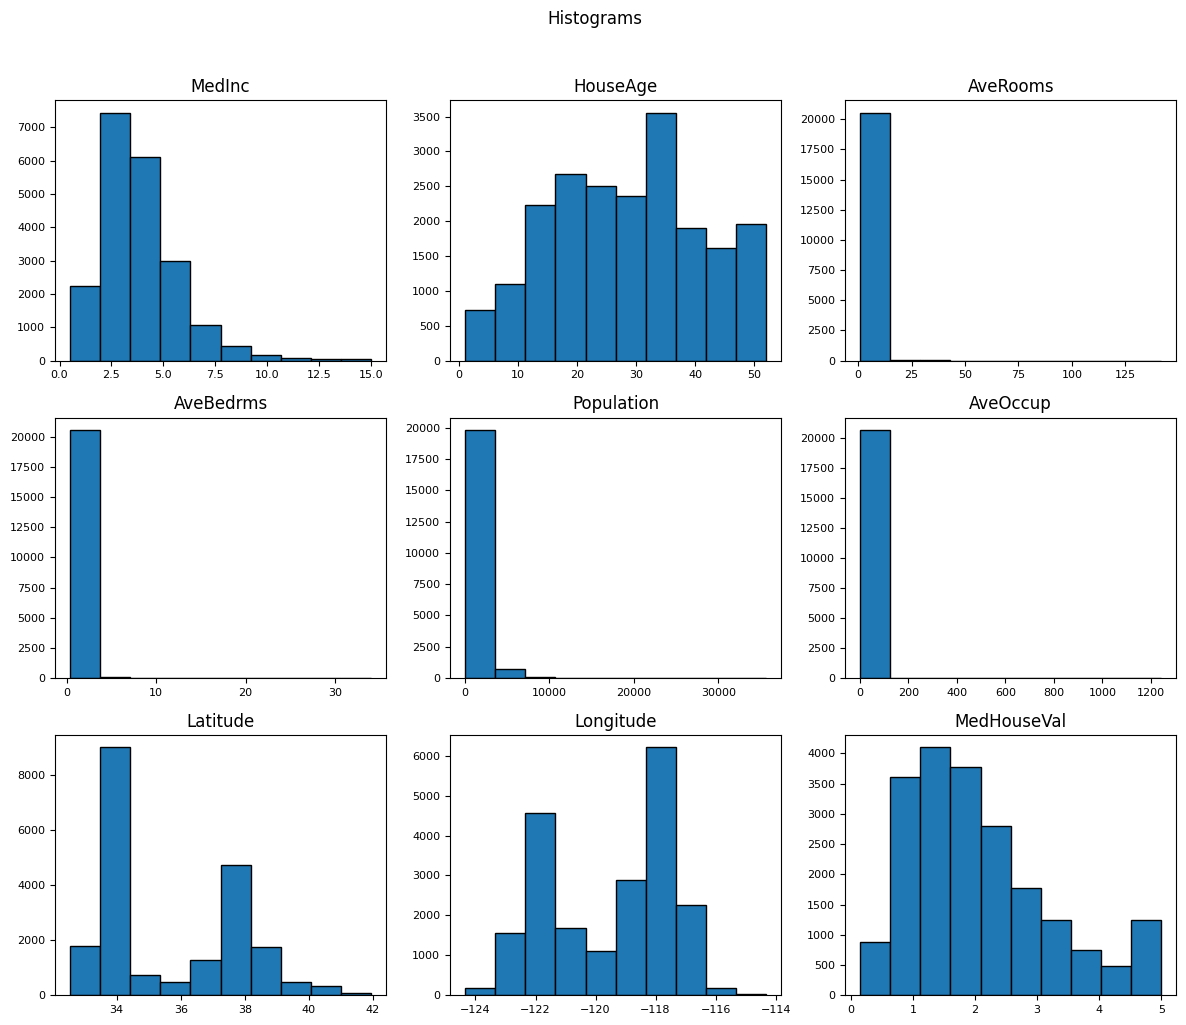

In [18]:
data.frame.hist(bins=10, figsize=(12, 10), grid=False, xlabelsize=8, ylabelsize=8,  edgecolor='black')
plt.suptitle('Histograms', y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

The histograms demonstrate that many of the variables are heavily right-skewed, indicating that most data points are concentrated at lower values with fewer high-value outliers.    
This pattern is typical in datasets concerning demographics, income, and real estate markets, where fewer households tend to have higher incomes, larger houses, or high occupancy rates.    
The geographic variables' distributions provide an overview of the dataset’s spatial distribution, which may reflect regional clustering.

### Correlation matrix

In [19]:
correlation_matrix = data.frame.corr()

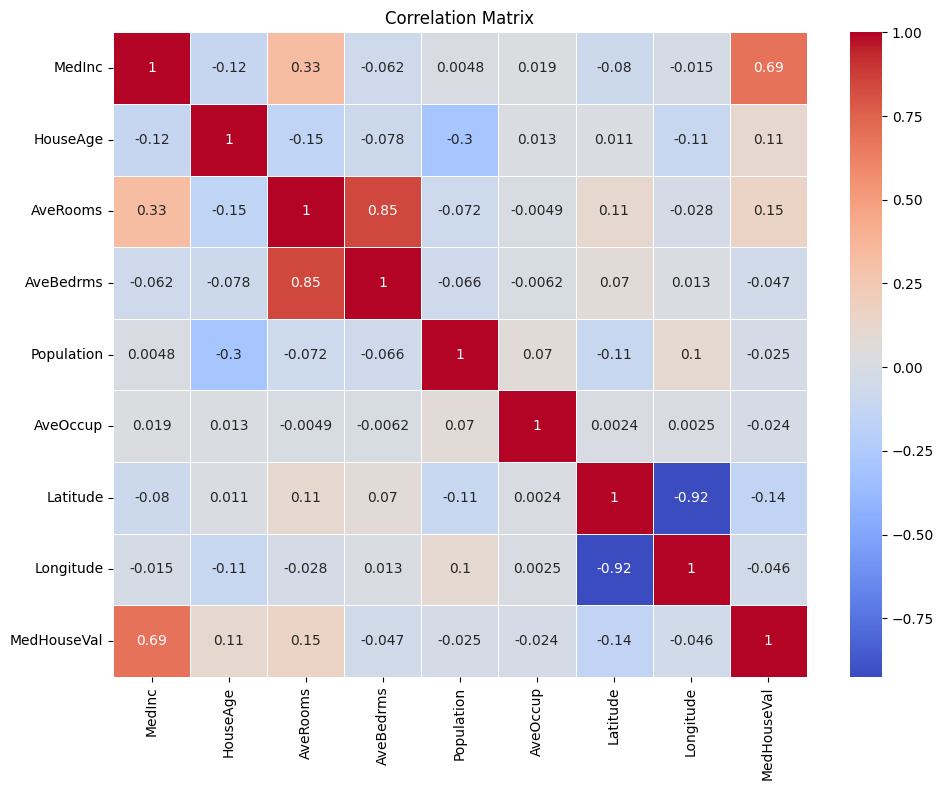

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

- There is a strong positive correlation (close to 1) between `AveRooms (Average Rooms per Household)` and `AveBedrms (Average Bedrooms per Household)`, indicating that regions with more average rooms per household also tend to have a higher average number of bedrooms per household. This correlation suggests these features are highly related and could be capturing similar information.   

- `MedInc (Median Income)` shows a moderate positive correlation with AveRooms, suggesting that higher median income areas are associated with properties that have more rooms on average.   

- Most other correlations appear weak or near zero, indicating little to no linear relationship between those variable pairs, such as between Population and MedHouseVal or between HouseAge and MedInc.   

- The relationships captured by `Latitude` and `Longitude` provide evidence of spatial dependency, which may be valuable for geographic or location-based analyses.
